# Lab 7 Exercises - Logistic Regression, K-NN & Naive Bayes Classifier



The US adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".

The goal here is to train the logistic regression, K-NN & Naive Bayes classifiers on the training dataset to predict the column `income_bracket` which has two possible values ">50K" and "<=50K" and compare the accuracy of each classifier with the test dataset.

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: `workclass, education, marital_status, occupation, relationship, race, gender, native_country`

The continuous columns are: `age, education_num, capital_gain, capital_loss, hours_per_week`

**Dataset columns**

```
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

income-bracket: <=50k, >50k
```

*Note: for the purposes of this exercise, fnlwgt (final weight, a value assigned by the census bureau as part of their sampling methodology of census data across the 51 states) can be dropped for simplicity*

**In this exercise we are going to use `%timeit` magic command to compare the runtime of the different algorithms together. We are going to use it once while building the model and once while scoring the model**

The `%timeit` magic command is used measure the execution time of a piece of code. In order to use it, write the command just before the relevant of code, in the same line to measure the execution time.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

<br/>
<br/>

Timeit Function: [Official Python Documentation - timeit function](https://docs.python.org/3/library/timeit.html)

%timeit Magic Command - Ipython: [ipython - timeit magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Extra Links on %timeit Magic Command: [nkme - timeit magic command](https://note.nkmk.me/en/python-timeit-measure)

**Example**

In [55]:
%timeit [num for num in range(20)]

485 ns ± 9.66 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In the above example, the list comprehension was evaluated for 7 runs with each run having 1 million loops (default behaviour). This took an average of 2.05 microseconds with a standard deviation of 31.8 nanoseconds (*it may return different results for each time you run the cell*).


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")
#when using colab
# Set the style for plots using the updated seaborn style
#plt.style.use("seaborn-v0_8") # Changed from 'seaborn' to 'seaborn-v0_8'

In [57]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading & Cleaning

**Dataset Loading**

Make sure the datasets have been loaded correctly. You may want to have a look at the [pd.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to resolve dataset loading issues.

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/main/data/census_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Check the unique values for each categorical attribute**

In [59]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

age: Number of unique values 74
workclass: Number of unique values 9
fnlwgt: Number of unique values 28523
education: Number of unique values 16
education_num: Number of unique values 16
marital_status: Number of unique values 7
occupation: Number of unique values 15
relationship: Number of unique values 6
race: Number of unique values 5
sex: Number of unique values 2
capital_gain: Number of unique values 123
capital_loss: Number of unique values 99
hours_per_week: Number of unique values 96
native_country: Number of unique values 42
income_bracket: Number of unique values 4


In [60]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education_num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 

In [61]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex : ['Male' 'Female']
native_country : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

**Handle inconsistencies and missing values**

In [62]:

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [63]:
df['income_bracket'] = df['income_bracket'].str.replace('.', '')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
df['income_bracket'].unique()

array(['<=50K', '>50K'], dtype=object)

In [65]:
df['workclass'] = df['workclass'].str.strip().replace('?', np.nan, regex = False )

For the sake of simplicty, we won't be using the fnlwgt attribute

**Drop the `fnlwgt` attribute from the dataset**

In [66]:
df.drop(['fnlwgt'], axis="columns", inplace=True)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis

**Q: Does education have an impact on a person's income bracket?**

*Hint: see lab 6 for an example of plotting a categorical attribute against a binary attribute.*

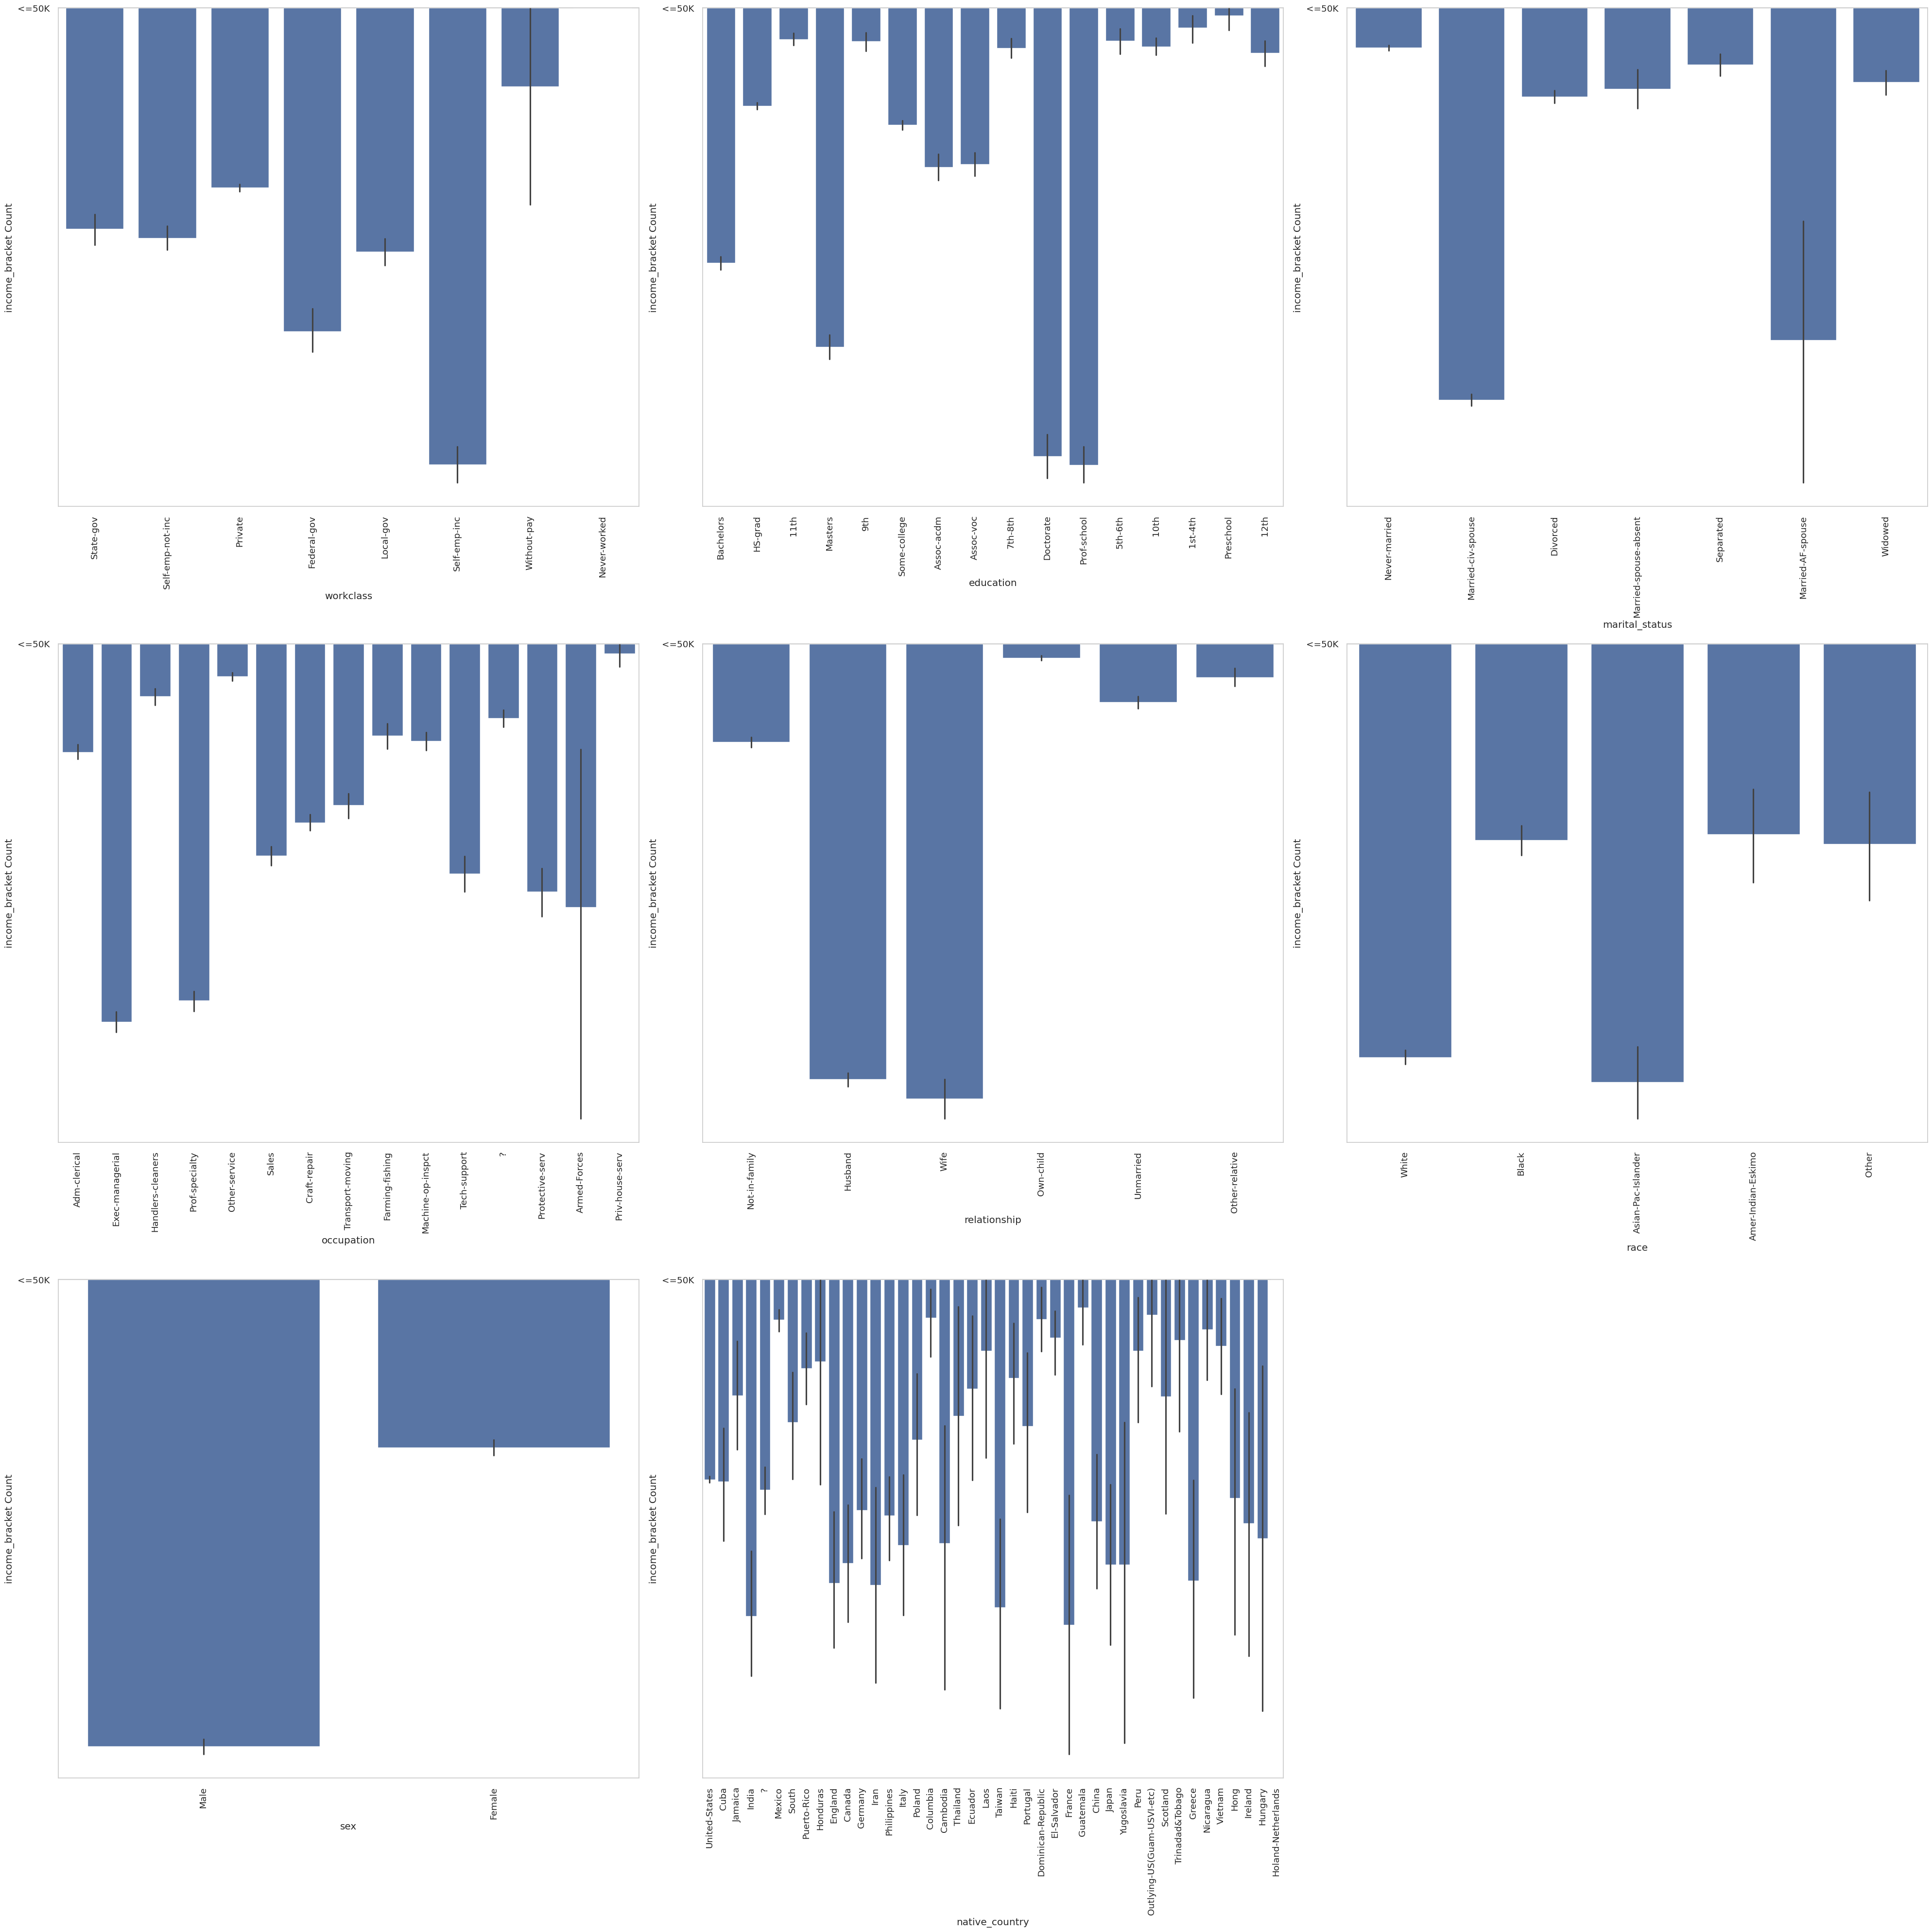

In [76]:
sns.set_theme(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(40, 40))

# Example: categorical_features is a list of your categorical columns
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=column, y='income_bracket', data=df)
    g.tick_params(axis='x', rotation=90)
    g.set_ylabel('income_bracket Count')
    g.set_xlabel(column)

plt.tight_layout()
plt.show()

## Data Preprocessing

**Encode the categorical columns using an appropriate strategy**

In [68]:
df_encoded = df.copy()

In [71]:

df_encoded.drop(['education'], axis='columns', inplace=True)

In [73]:
df_encoded.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

KeyError: "['education'] not in index"

**Apply Normalization on the numerical Columns**

## Modelling

**Split the data into training and testing sets, and then train the Logistic Regression, K-NN, and Naive Bayes Classifiers on the training set** (Use %timeit when building the model)

[Scikit-learn API Reference](https://scikit-learn.org/stable/modules/classes.html)

**Use the `timeit` magic command.**

The `timeit` magic command is used to measure the execution time for the small python code snippets. This command runs the code a million times (by default) to get the most precise value for the code execution time​.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

**Please note that, for this dataset you need to set the `max_iter` attribute of logistic regression to at least `2000` so that the model will be able converge, meaning that it could find a local optimal solution.**

Logistic regression fails to converge with this dataset if we run it for too few iterations. It could also be that the dataset is not linearly separable. Since this is a linear model, validation techinques like the ones used in lab 5 can be used.The logistic regression model is an iterative algorithm that is fitted in multiple iterations. It might not converge properly if the input variables are not normalized properly. In this case, it needs more iterations to be able to converge and find a solution.

So, you can set `max_iter` attribute of logistic regression to a larger value. The default is `1000`. This should be your last resort. So, if the algorithm does not converge within the first 1000 iterations, you need to set the `max_iter` to a larger value.


## Evaluation

**Evaluate each model using their built-in `score` function to get them evaluated based on the `accuracy` metric**

**Use `%timeit` when scoring the model**

## References

Dataset source: https://archive.ics.uci.edu/ml/datasets/census+income